# Signal Acceptance and Efficiency in the Recoil Tracker #

## Omar Moreno (SLAC National Accelarator Laboratory) ##

### Data ###


In [1]:
# This allows matplotlib plots to be shown inline
%matplotlib inline

# import needed libraries
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import root_numpy as rnp

from matplotlib.colors import LogNorm

# Set some matplotlib styles
plt.style.use('bmh')
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['legend.numpoints'] = 1

Welcome to ROOTaaS 6.06/08


In [2]:
# Method that calculates the Binomial errors
def binomial_error(total, passing) :
    return (1/total)*math.sqrt(passing*(1-passing/total))

In [3]:
# Load the records from a flat database containing information from the Ecal
event_numbers = np.genfromtxt("eventNumbers.txt", 
                     dtype=[('event', 'f8'), 
                            ('triggered', 'f8'),
                            ('ecal_energy', 'f8')],
                     delimiter=" "
                    )

In [4]:
# Location of the ROOT ntuple
file_path = '/home/omoreno/work/ldmx/analysis/signal_mc/signal_analysis_ntuple.root'
results_rec = rnp.root2array(file_path, 'results')

ap_mass = results_rec['ap_mass']
ap_masses = np.unique(ap_mass)

event = results_rec['event']

recoil_ecal_sp_x = results_rec['recoil_ecal_sp_x']
recoil_ecal_sp_y = results_rec['recoil_ecal_sp_y']

recoil_is_findable = results_rec['recoil_is_findable']
recoil_is_found    = results_rec['recoil_is_found']

recoil_p  = results_rec['recoil_truth_p']
recoil_pt = results_rec['recoil_truth_pt']
recoil_px = results_rec['recoil_truth_px']
recoil_py = results_rec['recoil_truth_py']
recoil_pz = results_rec['recoil_truth_pz']

recoil_vertex_x = results_rec['recoil_vertex_x']
recoil_vertex_y = results_rec['recoil_vertex_y']
recoil_vertex_z = results_rec['recoil_vertex_z']

theta = np.abs(np.arccos(np.divide(recoil_pz, recoil_p))*(180/math.pi))
phi = np.abs(np.arccos(np.divide(recoil_pz, recoil_pt))*(180/math.pi))

sim_hit_layer = results_rec['sim_hit_layer']
sim_hit_pos_x = results_rec['sim_hit_pos_x']
sim_hit_pos_y = results_rec['sim_hit_pos_y']
sim_hit_pos_z = results_rec['sim_hit_pos_z']
sim_hit_time  = results_rec['sim_hit_time']

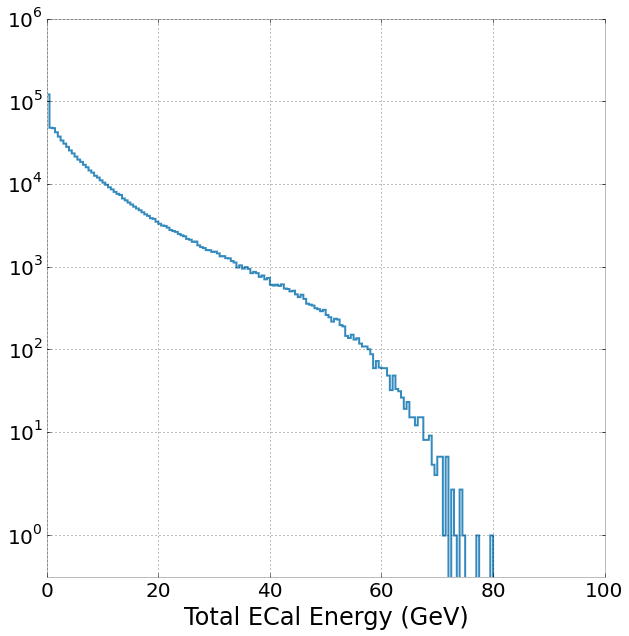

In [5]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

bins = np.linspace(0, 100, 201)
ax0.hist(event_numbers['ecal_energy'], bins, histtype='step', linewidth=2)
ax0.set_xlabel("Total ECal Energy (GeV)")
ax0.set_yscale("symlog")

## Recoil $e^{-}$ kinematics of signal events

### All Events

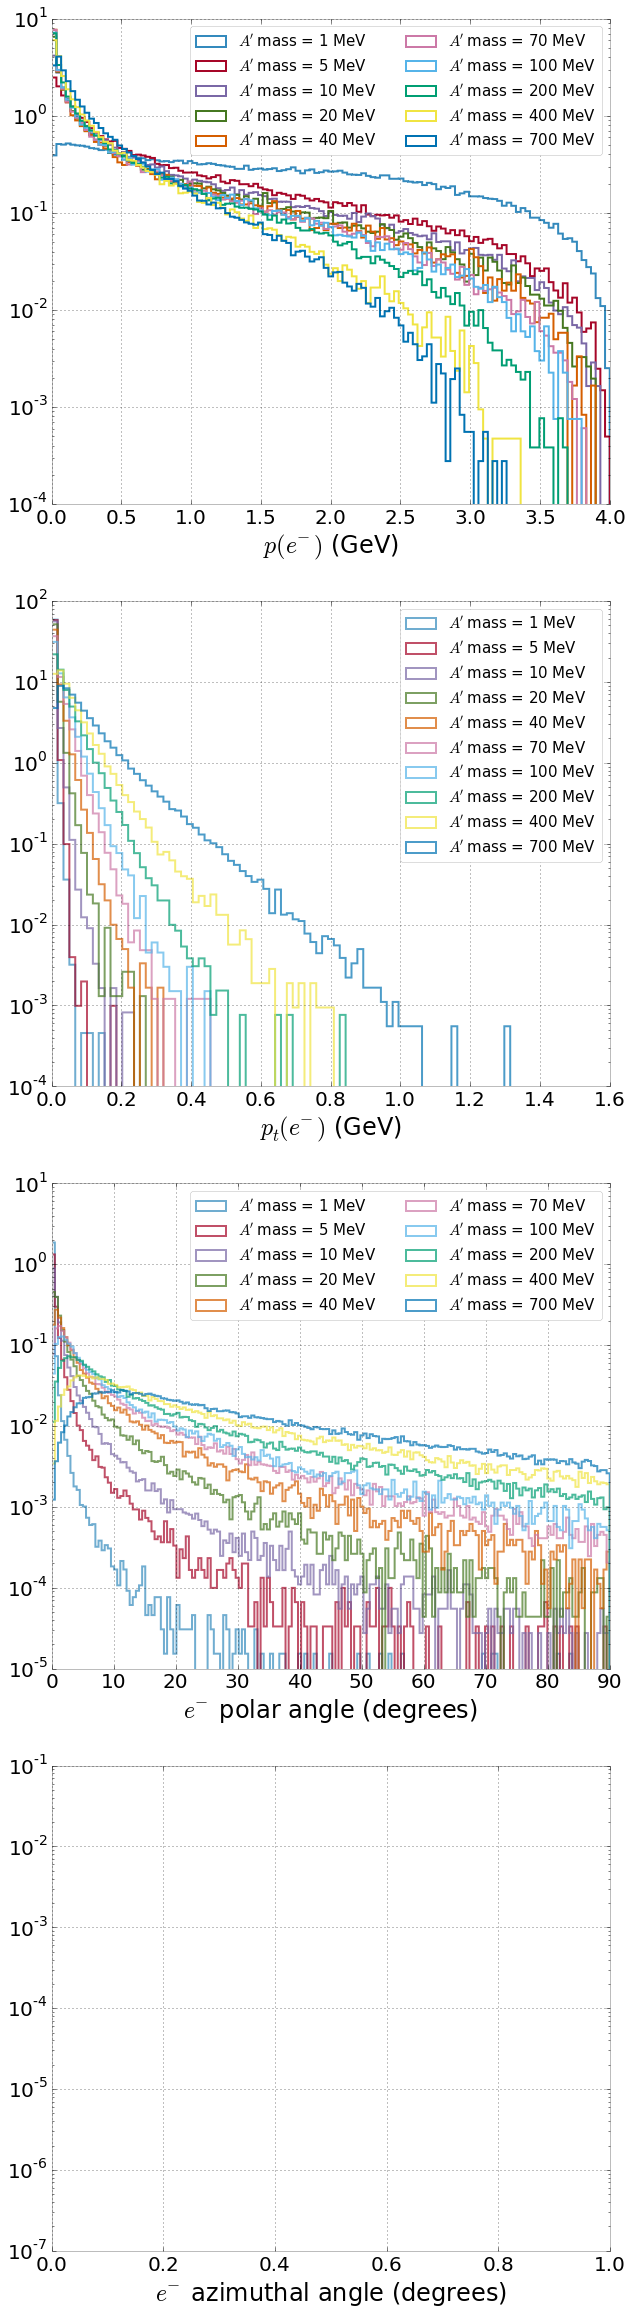

In [6]:
# Create the figure
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, ncols=1, figsize=(10, 40))

bins_p  = np.linspace(0, 4, 120)
bins_pt = np.linspace(0, 1.5, 90)
bins_theta = np.linspace(0, 90, 180)
bins_phi = np.linspace(-90, 90, 180)

for mass in ap_masses : 
    ax0.hist(recoil_p[ap_mass == mass], bins=bins_p, histtype='step', linewidth=2, 
             normed=True, label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
    ax1.hist(recoil_pt[ap_mass == mass], bins=bins_pt, alpha=0.7, histtype='step', linewidth=2,
             normed=True, label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
    ax2.hist(theta[ap_mass == mass], bins=bins_theta, alpha=0.7, histtype='step', linewidth=2,
             normed=True, label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
    

ax0.set_xlabel("$p(e^{-})$ (GeV)")
ax0.set_yscale("log")
ax0.legend(fontsize=15, ncol=2)

ax1.set_xlabel("$p_{t}(e^{-})$ (GeV)")
ax1.set_yscale("log")
ax1.legend(fontsize=15)

ax2.set_xlabel("$e^{-}$ polar angle (degrees)")
ax2.set_yscale("log")
ax2.legend(fontsize=15, ncol=2)

ax3.set_xlabel("$e^{-}$ azimuthal angle (degrees)")
ax3.set_yscale("log")
ax3.legend(fontsize=15, ncol=2);

### Events where the recoil $e^-$ is within the tracker acceptance

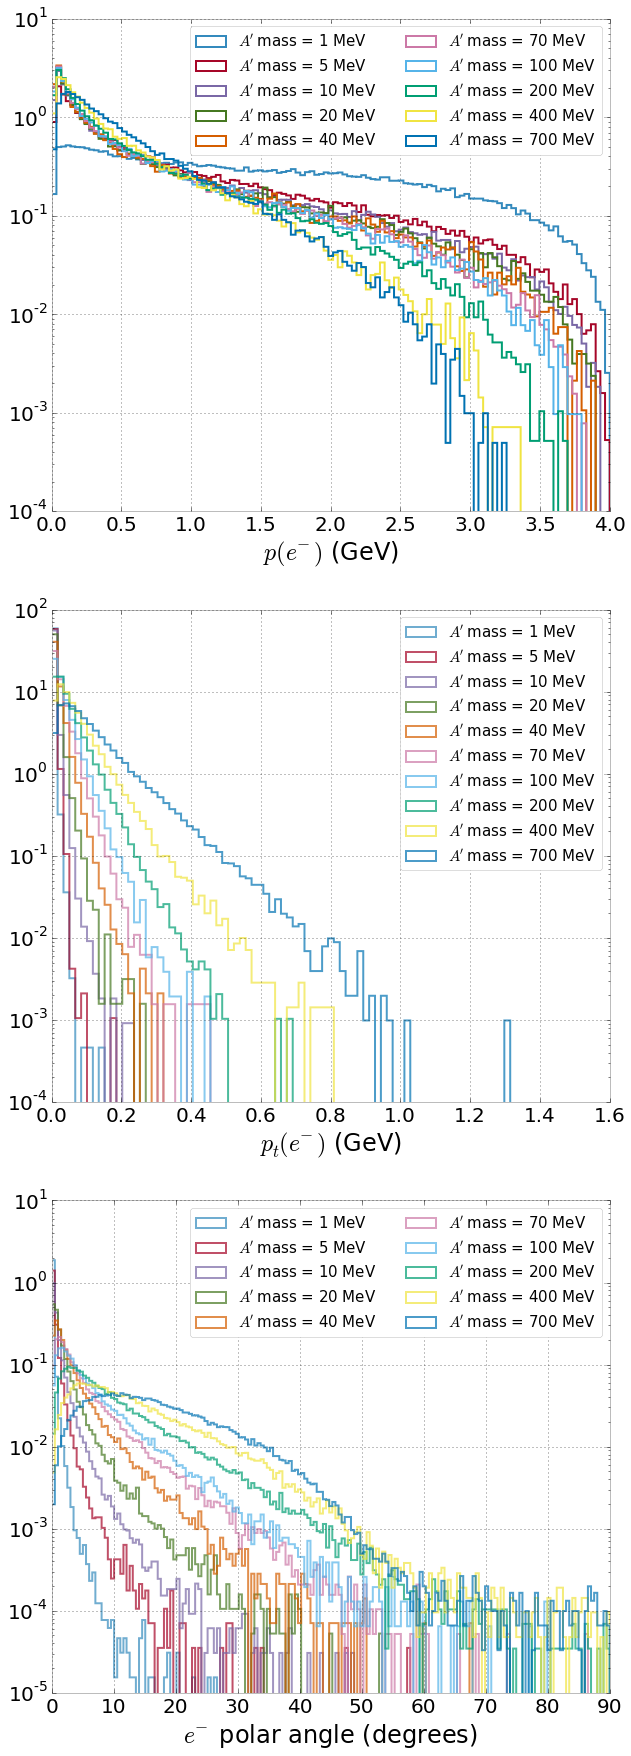

In [7]:
# Create the figure
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

bins_p  = np.linspace(0, 4, 120)
bins_pt = np.linspace(0, 1.5, 90)
bins_theta = np.linspace(0, 90, 180)

acceptance_cut = (recoil_is_findable == 1)

for mass in ap_masses : 
    selection = (ap_mass == mass) & acceptance_cut
    ax0.hist(recoil_p[selection], bins=bins_p, histtype='step', linewidth=2, 
             normed=True, label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
    ax1.hist(recoil_pt[selection], bins=bins_pt, alpha=0.7, histtype='step', linewidth=2,
             normed=True, label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
    ax2.hist(theta[selection], bins=bins_theta, alpha=0.7, histtype='step', linewidth=2,
             normed=True, label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
    

ax0.set_xlabel("$p(e^{-})$ (GeV)")
ax0.set_yscale("log")
ax0.legend(fontsize=15, ncol=2)

ax1.set_xlabel("$p_{t}(e^{-})$ (GeV)")
ax1.set_yscale("log")
ax1.legend(fontsize=15)

ax2.set_xlabel("$e^{-}$ polar angle (degrees)")
ax2.set_yscale("log")
ax2.legend(fontsize=15, ncol=2);

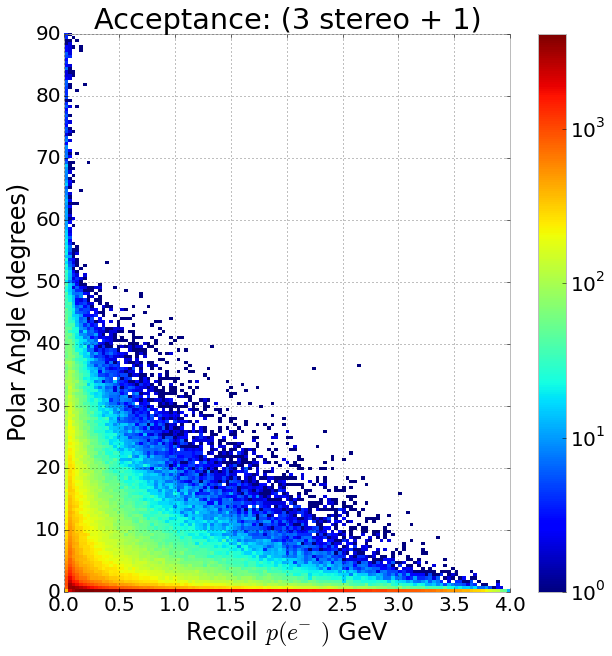

In [8]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

bins_p  = np.linspace(0, 4, 120)
bins_theta = np.linspace(0, 90, 180)

acceptance_cut = (recoil_is_findable == 1)

im = ax0.hist2d(recoil_p[acceptance_cut], theta[acceptance_cut], 
           bins=[bins_p, bins_theta], norm=LogNorm())
ax0.set_title("Acceptance: (3 stereo + 1)")
fig.colorbar(im[3], ax=ax0)
ax0.set_xlabel("Recoil $p(e^-)$ GeV")
ax0.set_ylabel("Polar Angle (degrees)");

In [ ]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))
            
    bins = np.linspace(0, 200, 51)
    diff_map = {}
    for mass in ap_masses :
                
        ap_recoil_ecal_sp_x = self.recoil_ecal_sp_x[
                (self.ap_mass == mass) & (self.recoil_truth_p > 0.05) & (self.recoil_truth_p  < 1.2)
        ]
                ap_recoil_vertex_x = self.recoil_vertex_x[
                    (self.ap_mass == mass) & (self.recoil_truth_p > 0.05) & (self.recoil_truth_p  < 1.2)
                ] 
                ap_recoil_ecal_sp_y = self.recoil_ecal_sp_y[
                    (self.ap_mass == mass) & (self.recoil_truth_p > 0.05) & (self.recoil_truth_p  < 1.2)
                ]
                ap_recoil_vertex_y = self.recoil_vertex_y[
                    (self.ap_mass == mass) & (self.recoil_truth_p > 0.05) & (self.recoil_truth_p  < 1.2)
                ]
                diff_x = np.subtract(ap_recoil_vertex_x, ap_recoil_ecal_sp_x)
                diff_y = np.subtract(ap_recoil_vertex_y, ap_recoil_ecal_sp_y)
                r = np.sqrt(np.add(np.power(diff_x, 2), np.power(diff_y, 2)))
                diff_map[mass] = r

            
                ax0.hist(r, bins=bins, histtype='step', normed=True, 
                         linewidth=2, label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
            ax0.set_title("$e^{-}$ transverse distance from beam spot at face of Ecal.", fontsize=12)
            ax0.set_ylabel("Event Fraction/4 mm")
            ax0.set_xlabel("Transverse Seperation (mm)")
            #ax0.set_yscale("log")
            ax0.legend(fontsize=10, loc=1)


### Events where the recoil $e^-$ is within the tracker acceptance and $p(e^-) < $ 1.2 GeV

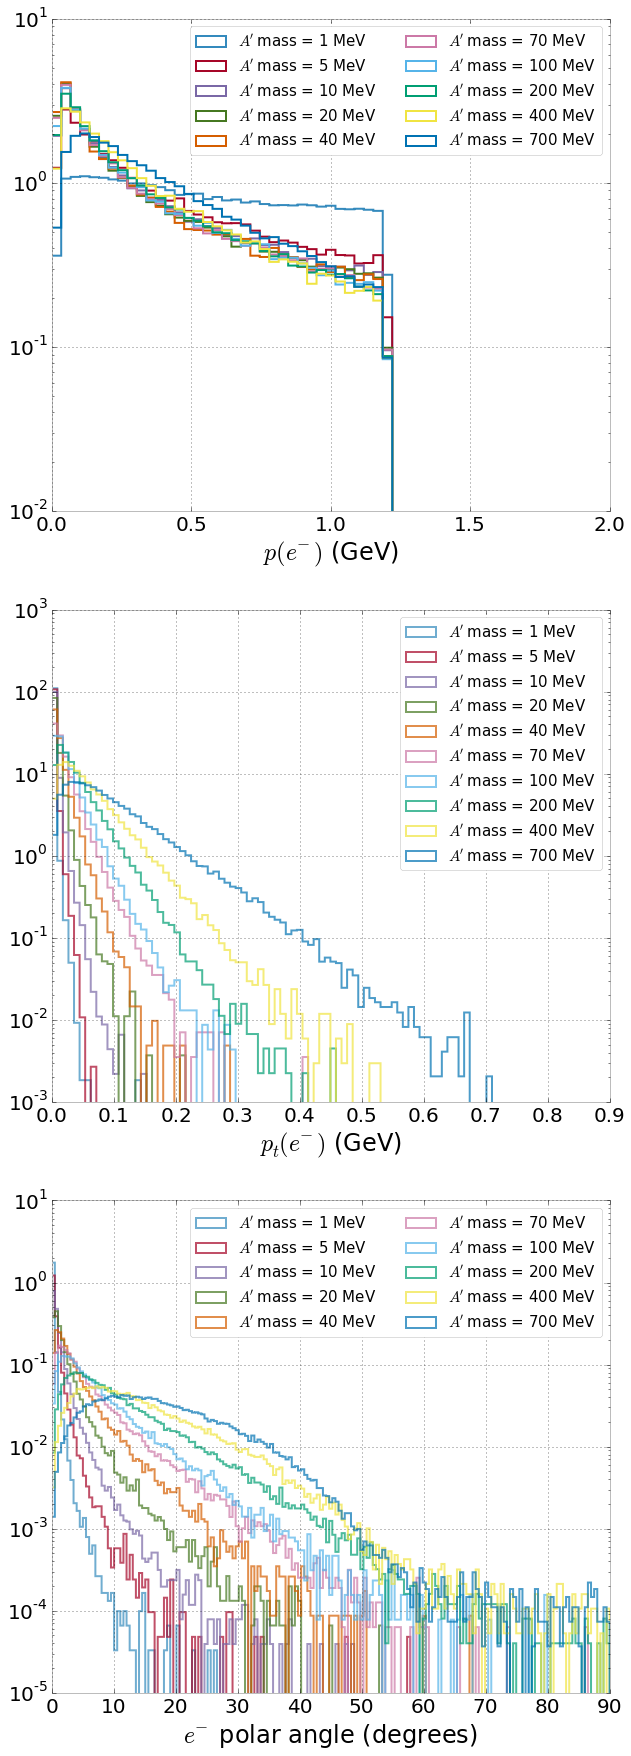

In [9]:
# Create the figure
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

bins_p  = np.linspace(0, 2, 60)
bins_pt = np.linspace(0, 0.8, 90)
bins_theta = np.linspace(0, 90, 180)

acceptance_cut = (recoil_is_findable == 1) & (recoil_p < 1.2)

for mass in ap_masses : 
    selection = (ap_mass == mass) & acceptance_cut
    ax0.hist(recoil_p[selection], bins=bins_p, histtype='step', linewidth=2, 
             normed=True, label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
    ax1.hist(recoil_pt[selection], bins=bins_pt, alpha=0.7, histtype='step', linewidth=2,
             normed=True, label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
    ax2.hist(theta[selection], bins=bins_theta, alpha=0.7, histtype='step', linewidth=2,
             normed=True, label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
    

ax0.set_xlabel("$p(e^{-})$ (GeV)")
ax0.set_yscale("log")
ax0.legend(fontsize=15, ncol=2)

ax1.set_xlabel("$p_{t}(e^{-})$ (GeV)")
ax1.set_yscale("log")
ax1.legend(fontsize=15)

ax2.set_xlabel("$e^{-}$ polar angle (degrees)")
ax2.set_yscale("log")
ax2.legend(fontsize=15, ncol=2);

## Signal Acceptance

In [ ]:
tracker_acceptance     = []
tracker_acceptance_err = []

tracker_acceptance_p_cut     = []
tracker_acceptance_p_cut_err = []

combined_acceptance     = []
combined_acceptance_err = []

for mass in ap_masses :

    ap_acceptance = recoil_is_findable[mass == ap_mass]
    ap_events = event[mass == ap_mass]
    
    events_within_full_acceptance = 0
    for index in xrange(0, len(ap_acceptance)) : 
        #print "Withing tracker acceptance? " + str(ap_acceptance[index])
        #print "Event triggered? " + str(event_numbers['triggered'][event_numbers['event'] == ap_events[index]])
        #if event_numbers['triggered'][event_numbers['event'] == ap_events[index]] == 1 : 
        #    print "Event triggered!"
        if ((event_numbers['triggered'][event_numbers['event'] == ap_events[index]] == 1) & (ap_acceptance[index] == 1)) : 
            #print "Event triggered and was within the acceptance of the tracker."
            events_within_full_acceptance += 1
    
#    acceptance = is_within_acceptance[mass == ap_mass]
#    ap_events = events[mass == ap_mass]
    tracker_acceptance_trigger.append((float(events_within_full_acceptance)/float(len(ap_acceptance)))*100)
    tracker_acceptance_trigger_err.append(binomial_error(len(ap_acceptance), events_within_full_acceptance)*100)
    
    tracker_acceptance_all.append((float(len(ap_acceptance[ap_acceptance == 1]))/float(len(ap_acceptance)))*100)
    tracker_acceptance_all_err.append(binomial_error(len(ap_acceptance), len(ap_acceptance[ap_acceptance == 1]))*100)
    
    ap_acceptance = ap_acceptance[(recoil_p[mass == ap_mass] < 1.2) & (recoil_p[mass == ap_mass] > 0.05)]
    tracker_acceptance_energy_cut.append((float(len(ap_acceptance[ap_acceptance == 1]))/float(len(ap_acceptance)))*100)
    tracker_acceptance_energy_cut_err.append(binomial_error(len(ap_acceptance), len(ap_acceptance[ap_acceptance == 1]))*100)
    
# Create the figure
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))

ax0.errorbar(ap_masses*1000, tracker_acceptance_all, yerr=tracker_acceptance_all_err,
             marker='o', markersize=10, linestyle='--', label='First 3 layers hit + 1, no energy cut')
ax0.errorbar(ap_masses*1000, tracker_acceptance_energy_cut, yerr=tracker_acceptance_energy_cut_err,
             marker='o', markersize=10, linestyle='--', label='First 3 layers hit + 1, 0.05 < p(e-) < 1.2')
ax0.errorbar(ap_masses*1000, tracker_acceptance_trigger, yerr=tracker_acceptance_all_err,
             marker='o', markersize=10, linestyle='--', label='Tracker + Ecal');

#ax0.set_ylim(30, 100)
#ax0.set_xlabel("$A'$ Mass (MeV)")
#ax0.set_ylabel("Acceptance (%)")
#ax0.legend(fontsize=15);

In [ ]:
# Create the figure
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7.5))

ax0.errorbar(ap_masses*1000, tracker_acceptance_trigger, yerr=tracker_acceptance_all_err,
             marker='o', markersize=10, linestyle='--', label='First 3 layers hit + 1, 0.05 < p(e-) < 1.2');

ax0.set_ylim(30, 100)
ax0.set_xlabel("$A'$ Mass (MeV)")
ax0.set_ylabel("Acceptance (%)")
#ax0.legend(fontsize=15);